##### Mediapipe 物體偵測 ( Objectron )
這篇教學會使用 MediaPipe 的物體偵測模型 ( Objectron ) 偵測特定的物體，\
再透過 OpenCV 讀取攝影鏡頭影像進行辨識，使用 3D 的立方體形狀匡出偵測到的物體。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 使用 MediaPipe，偵測物體 
Mediapipe Objectron 模型可以透過 3D 立方體標記偵測到的「特定物體」，並進一步標記出所偵測到物體的 3D 大小，\
3D 空間並非真正的立體空間，而是透過「2D 邊界」搭配「深度學習」所計算得出 ( [圖片來源](https://google.github.io/mediapipe/solutions/objectron#model_name) )。

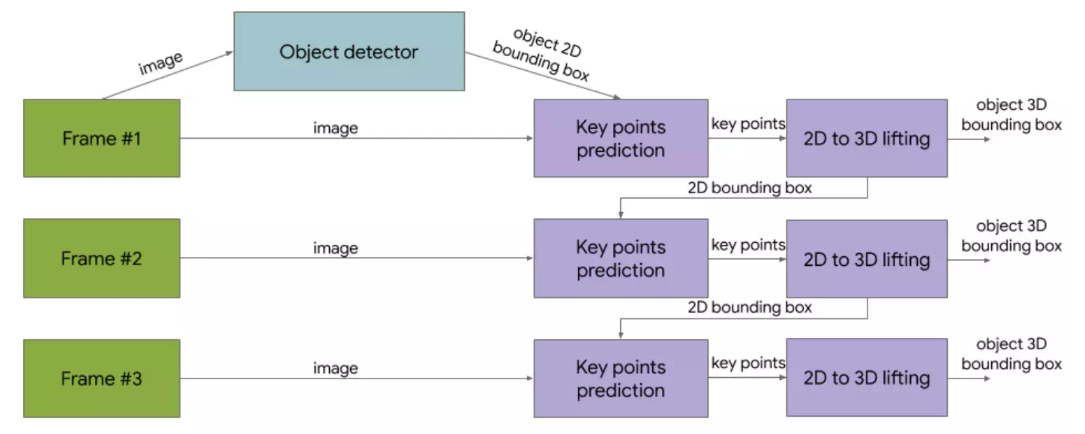

目前 Mediapipe Objectron 可以偵測 Cup ( 馬克杯 )、Shoe ( 鞋子 )、Camera ( 單眼相機 ) 和 Chair ( 椅子 ) 四種物體，\
未來會陸續提供更多可偵測的物體 ( 詳細參考：[Objectron Dataset](https://github.com/google-research-datasets/Objectron/) )

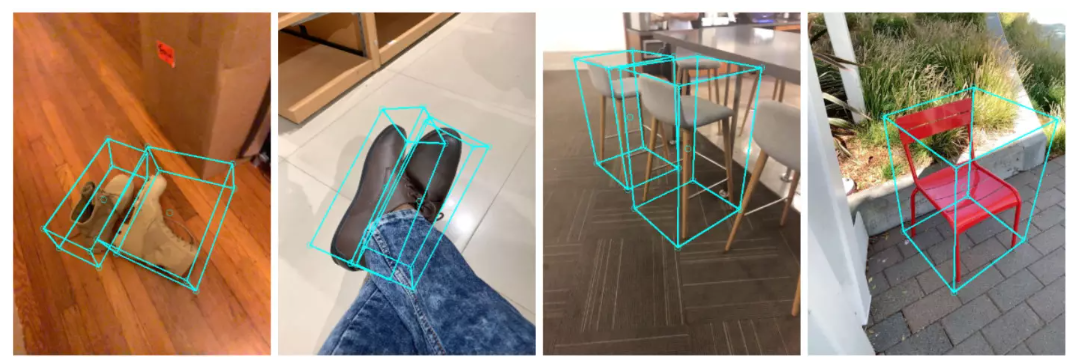

下方的程式碼延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，搭配 mediapipe 物體偵測的方法，透過攝影鏡頭獲取影像後，即時標記出腳上穿的鞋子。

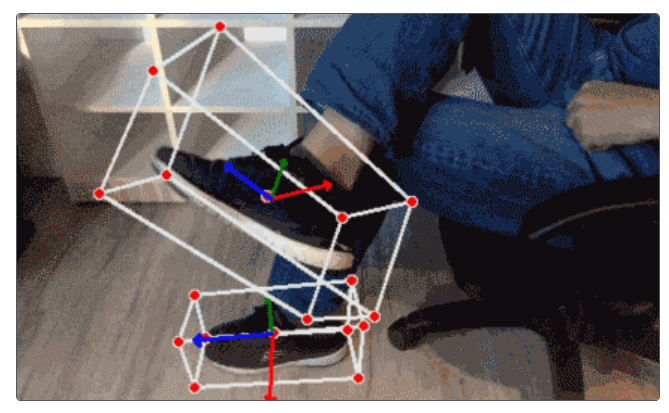

In [ ]:
import cv2
import mediapipe as mp

# 初始化 mediapipe 的繪圖工具和物體偵測模組
mp_drawing = mp.solutions.drawing_utils  # mediapipe 繪圖方法
mp_objectron = mp.solutions.objectron    # mediapipe 物體偵測

# 開啟攝影機
cap = cv2.VideoCapture(0)

# 啟用物體偵測，偵測鞋子 (Shoe)
with mp_objectron.Objectron(
    static_image_mode=False,          # 是否使用靜態影像模式
    max_num_objects=5,                # 最大偵測物體數量
    min_detection_confidence=0.5,     # 最小偵測信心值
    min_tracking_confidence=0.99,     # 最小追蹤信心值
    model_name='Shoe') as objectron:  # 偵測模型名稱

    if not cap.isOpened():
        print("Cannot open camera")  # 無法開啟攝影機
        exit()
    
    while True:
        ret, img = cap.read()  # 讀取攝影機影像
        if not ret:
            print("Cannot receive frame")  # 無法接收影像
            break
        
        img = cv2.resize(img, (1920, 1080))  # 縮小尺寸，加快演算速度
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換成 RGB
        
        results = objectron.process(img2)  # 取得物體偵測結果
        
        # 標記所偵測到的物體
        if results.detected_objects:
            for detected_object in results.detected_objects:
                # 繪製 2D 標記
                mp_drawing.draw_landmarks(
                    img,  # 原始影像
                    detected_object.landmarks_2d,  # 偵測到的物體的 2D 節點
                    mp_objectron.BOX_CONNECTIONS  # 節點之間的連接
                )
                # 繪製 3D 標記
                mp_drawing.draw_axis(
                    img,  # 原始影像
                    detected_object.rotation,  # 物體的旋轉矩陣
                    detected_object.translation  # 物體的平移向量
                )

        cv2.imshow('oxxostudio', img)  # 顯示影像
        if cv2.waitKey(5) == ord('q'):
            break  # 按下 q 鍵停止
        
cap.release()  # 釋放攝影機資源
cv2.destroyAllWindows()  # 關閉所有 OpenCV 視窗

參考資料 
* [MediaPipe Objectron](https://google.github.io/mediapipe/solutions/objectron)